In [1]:
#Make python screen wider
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [304]:
import numpy as np
import wget
import pandas as pd
import statistics as st
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#increase the width of the line
large_width = 400
np.set_printoptions(linewidth=large_width)

## Homework

### Dataset

In this homework, we will use the California Housing Prices data from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```
We'll keep working with the `'median_house_value'` variable, and we'll transform it to a classification task. 

In [3]:
wget.download("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

100% [..........................................................................] 1423529 / 1423529

'housing.csv'

In [32]:
df_raw=pd.read_csv('housing.csv')

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`
* `'ocean_proximity'`,

### Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe. 

In [33]:
df = data_raw[['latitude', 'longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity']].copy()
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [34]:
df = df.fillna(0)
df.isna().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            20640 non-null  float64
 1   longitude           20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [37]:
df['rooms_per_household'] = (df['total_rooms']/df['households'])
df['bedrooms_per_room'] = (df['total_bedrooms']/df['total_rooms'])
df['population_per_household'] = (df['population']/df['households'])

In [38]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* `<1H OCEAN`
* `INLAND`
* `NEAR OCEAN`
> ANSWER  
  `<1H OCEAN`

In [39]:
#manual mode
df_mode_manual = df['ocean_proximity'].value_counts(dropna = False).index
df_mode_manual[0]

'<1H OCEAN'

In [40]:
#mode using st package
df_mode2 = st.mode(df['ocean_proximity'])
df_mode2

'<1H OCEAN'

## add new variables before splitting

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.

## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.

In [43]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)
len(df), len(df_train), len(df_val), len(df_test)

(20640, 12384, 4128, 4128)

In [44]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [45]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`

> ANSWER  
  `total_bedrooms` and `households`

In [143]:
df_num = df_train.select_dtypes(include=np.number)
#alternative
# df_num2 = df_train.select_dtypes(include='number')
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12384 entries, 17244 to 8472
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude                  12384 non-null  float64
 1   longitude                 12384 non-null  float64
 2   housing_median_age        12384 non-null  float64
 3   total_rooms               12384 non-null  float64
 4   total_bedrooms            12384 non-null  float64
 5   population                12384 non-null  float64
 6   households                12384 non-null  float64
 7   median_income             12384 non-null  float64
 8   rooms_per_household       12384 non-null  float64
 9   bedrooms_per_room         12384 non-null  float64
 10  population_per_household  12384 non-null  float64
dtypes: float64(11)
memory usage: 1.1 MB


In [144]:
corr_matrix = df_num.corr(method='pearson')
corr_matrix.mask(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1464\4190603247.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_matrix.mask(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
latitude,NaN,-0.925005,0.002477,-0.025914,-0.059730,-0.100272,-0.063529,-0.076805,0.119118,-0.124507,-0.002301
longitude,NaN,NaN,-0.099812,0.036449,0.063840,0.091670,0.049762,-0.016426,-0.034814,0.102320,0.011022
housing_median_age,NaN,NaN,NaN,-0.363522,-0.324156,-0.292476,-0.306119,-0.119591,-0.181275,0.129456,0.012167
total_rooms,NaN,NaN,NaN,NaN,0.931546,0.853219,0.921441,0.198951,0.168926,-0.194185,-0.029452
total_bedrooms,NaN,NaN,NaN,NaN,NaN,0.877340,0.979399,-0.009833,0.010381,0.078094,-0.034301
population,NaN,NaN,NaN,NaN,NaN,NaN,0.906841,-0.000849,-0.076210,0.031592,0.064998
households,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011925,-0.085832,0.058004,-0.032522
median_income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394154,-0.616617,-0.000454
rooms_per_household,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.500589,0.001801
bedrooms_per_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002851


<AxesSubplot:>

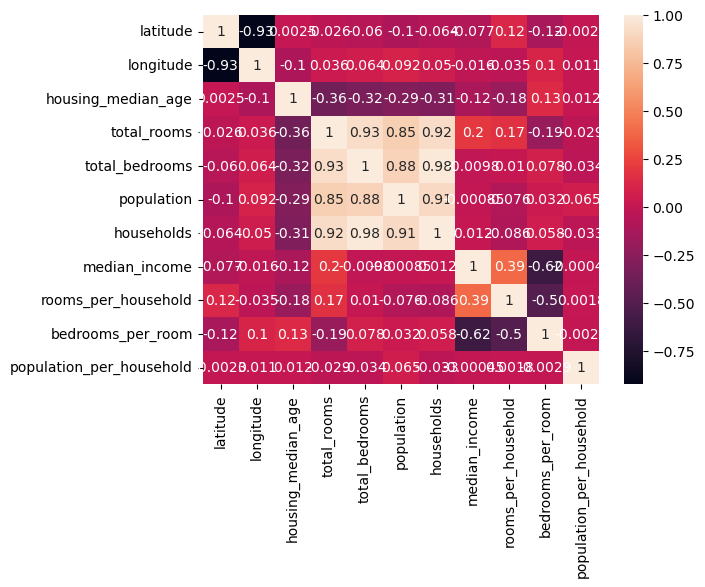

In [145]:
sns.heatmap(corr_matrix, annot=True)

In [140]:
# Keep lower triangle (np.array)

# so2[:] = np.tril(corr_matrix, k=-1)
# so2.unstack().sort_values(ascending=False)
# so2

In [138]:
#multiindex to DF
# sorted_mat2 = corr_matrix.unstack().sort_values(ascending=False).reset_index()
# sorted_mat2.columns=['var1','var2','corr']
# sorted_mat2

In [146]:
sorted_mat = corr_matrix.unstack().sort_values(ascending=False)
# len(sorted_mat)
# type(sorted_mat)
sorted_mat[sorted_mat.values != 1].head(1)

total_bedrooms  households    0.979399
dtype: float64

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

In [153]:
df_describe = pd.DataFrame(y_train).describe()
df_describe

,0
count,12384.000000
mean,206807.741925
std,115096.161399
min,14999.000000
25%,119800.000000
50%,179800.000000
75%,264625.000000
max,500001.000000


In [154]:
y_train_mean = y_train.mean()
y_train_mean

206807.7419250646

In [189]:
#These variables become the new binary target variables
above_average      = (y_train_mean<y_train).astype('int')
above_average_val  = (y_train_mean<y_val).astype('int')
above_average_test = (y_train_mean<y_test).astype('int')
above_average

array([1, 1, 0, ..., 1, 0, 0])

In [190]:
#variable logic confirmation
datatest = pd.DataFrame({'target': y_train,'mean':y_train_mean,'above_average': above_average })
datatest

,target,mean,above_average
0,241400.0,206807.741925,1
1,500001.0,206807.741925,1
2,64100.0,206807.741925,0
3,277200.0,206807.741925,1
4,417000.0,206807.741925,1
...,...,...,...
12379,154200.0,206807.741925,0
12380,146400.0,206807.741925,0
12381,215300.0,206807.741925,1
12382,139000.0,206807.741925,0


In [187]:
#append variables if needed
# df_train['above_average'] = above_average.tolist()
# df_train['median_house_value'] = y_train.tolist()
# df_train.head()

In [185]:
del df_train['above_average']

In [186]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17244,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
8817,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
19686,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3545,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
17019,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

Options:
- 0.263
- 0.00001
- 0.101
- 0.15555

> ANSWER  
  `0.101`

In [193]:
round(mutual_info_score(df_train["ocean_proximity"], above_average),3) #used round 3 instead of 2 to find the match with one of the answers offered

0.101

### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84
- 0.95

> ANSWER  
  `0.84`

#### BEGINNING OF CLEAN QUESTION 4 - SHORT METHOD

In [408]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17244,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
8817,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
19686,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3545,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
17019,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456
...,...,...,...,...,...,...,...,...,...,...,...,...
5606,33.79,-118.29,16.0,1867.0,571.0,951.0,498.0,3.3427,<1H OCEAN,3.748996,0.305838,1.909639
16339,38.04,-121.34,16.0,3295.0,565.0,2279.0,576.0,3.6083,INLAND,5.720486,0.171472,3.956597
14965,32.74,-116.99,18.0,3341.0,611.0,1952.0,602.0,3.9844,<1H OCEAN,5.549834,0.182879,3.242525
11117,33.84,-117.87,16.0,1545.0,354.0,730.0,350.0,4.5112,<1H OCEAN,4.414286,0.229126,2.085714


In [409]:
df_train_3 = df_train.copy()

In [410]:
train_dict_3 = df_train.to_dict(orient='records')

In [411]:
train_dict_3[0]

{'latitude': 34.43,
 'longitude': -119.67,
 'housing_median_age': 39.0,
 'total_rooms': 1467.0,
 'total_bedrooms': 381.0,
 'population': 1404.0,
 'households': 374.0,
 'median_income': 2.3681,
 'ocean_proximity': '<1H OCEAN',
 'rooms_per_household': 3.9224598930481283,
 'bedrooms_per_room': 0.25971370143149286,
 'population_per_household': 3.7540106951871657}

In [412]:
dv_3 = DictVectorizer(sparse=False)
dv_3.fit(train_dict_3)

DictVectorizer(sparse=False)

In [416]:
dv_3.transform(train_dict_3)

array([[2.59713701e-01, 3.74000000e+02, 3.90000000e+01, ..., 3.92245989e+00, 3.81000000e+02, 1.46700000e+03],
       [1.30227981e-01, 8.06000000e+02, 2.40000000e+01, ..., 7.56451613e+00, 7.94000000e+02, 6.09700000e+03],
       [2.34624146e-01, 3.37000000e+02, 4.10000000e+01, ..., 3.90801187e+00, 3.09000000e+02, 1.31700000e+03],
       ...,
       [1.82879377e-01, 6.02000000e+02, 1.80000000e+01, ..., 5.54983389e+00, 6.11000000e+02, 3.34100000e+03],
       [2.29126214e-01, 3.50000000e+02, 1.60000000e+01, ..., 4.41428571e+00, 3.54000000e+02, 1.54500000e+03],
       [2.09574468e-01, 2.15000000e+02, 3.50000000e+01, ..., 4.37209302e+00, 1.97000000e+02, 9.40000000e+02]])

In [365]:
list(dv_3.transform(train_dict_3[:17])[0])

[0.25971370143149286,
 374.0,
 39.0,
 34.43,
 -119.67,
 2.3681,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1404.0,
 3.7540106951871657,
 3.9224598930481283,
 381.0,
 1467.0]

In [366]:
dv.get_feature_names_out()

array(['ocean_proximity=<1H OCEAN', 'ocean_proximity=INLAND', 'ocean_proximity=ISLAND', 'ocean_proximity=NEAR BAY', 'ocean_proximity=NEAR OCEAN'], dtype=object)

In [362]:
X_train = dv_3.transform(train_dict_3)

In [363]:
X_train.shape

(12384, 16)

In [392]:
X_train

array([[2.59713701e-01, 3.74000000e+02, 3.90000000e+01, ..., 3.92245989e+00, 3.81000000e+02, 1.46700000e+03],
       [1.30227981e-01, 8.06000000e+02, 2.40000000e+01, ..., 7.56451613e+00, 7.94000000e+02, 6.09700000e+03],
       [2.34624146e-01, 3.37000000e+02, 4.10000000e+01, ..., 3.90801187e+00, 3.09000000e+02, 1.31700000e+03],
       ...,
       [1.82879377e-01, 6.02000000e+02, 1.80000000e+01, ..., 5.54983389e+00, 6.11000000e+02, 3.34100000e+03],
       [2.29126214e-01, 3.50000000e+02, 1.60000000e+01, ..., 4.41428571e+00, 3.54000000e+02, 1.54500000e+03],
       [2.09574468e-01, 2.15000000e+02, 3.50000000e+01, ..., 4.37209302e+00, 1.97000000e+02, 9.40000000e+02]])

In [367]:
model_3 = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [389]:
model_3.fit(X_train, above_average)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [394]:
# Same procedure for the validation dataset (One Hot Enconding)

df_val

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
2071,36.74,-119.85,35.0,1191.0,190.0,537.0,182.0,3.5375,INLAND,6.543956,0.159530,2.950549
2612,41.02,-124.16,23.0,1672.0,385.0,1060.0,390.0,2.1726,NEAR OCEAN,4.287179,0.230263,2.717949
10838,33.67,-117.92,14.0,6224.0,1679.0,3148.0,1589.0,4.2071,<1H OCEAN,3.916929,0.269762,1.981120
4061,34.15,-118.45,10.0,1091.0,260.0,517.0,266.0,4.1727,<1H OCEAN,4.101504,0.238313,1.943609
10767,33.63,-117.90,28.0,2370.0,352.0,832.0,347.0,7.1148,<1H OCEAN,6.829971,0.148523,2.397695
...,...,...,...,...,...,...,...,...,...,...,...,...
2285,36.79,-119.77,27.0,2258.0,427.0,1076.0,423.0,2.9937,INLAND,5.338061,0.189105,2.543735
16904,37.58,-122.35,30.0,5039.0,1564.0,2129.0,1536.0,3.3469,NEAR OCEAN,3.280599,0.310379,1.386068
18139,37.34,-122.01,31.0,3080.0,526.0,1493.0,582.0,6.3052,<1H OCEAN,5.292096,0.170779,2.565292
11471,33.67,-118.00,34.0,3712.0,667.0,1521.0,632.0,4.8125,<1H OCEAN,5.873418,0.179688,2.406646


In [395]:
val_dict_3 = df_val.to_dict(orient='records')

In [417]:
#there is no need to fit on the validation dataset
X_val_3 = dv_3.transform(val_dict_3)

In [397]:
model_3.predict_proba(X_val_3)

array([[0.91245709, 0.08754291],
       [0.84006404, 0.15993596],
       [0.04791432, 0.95208568],
       ...,
       [0.04120502, 0.95879498],
       [0.15063196, 0.84936804],
       [0.52768249, 0.47231751]])

In [398]:
y_pred_3 = model_3.predict_proba(X_val_3)[:,1]

In [399]:
y_pred_3

array([0.08754291, 0.15993596, 0.95208568, ..., 0.95879498, 0.84936804, 0.47231751])

In [405]:
above = y_pred_3 >0.5

In [418]:
(above_average_val == above).mean()

0.8359980620155039

In [447]:
round((above_average_val == above).mean(),2)

0.84

In [419]:
above_average.shape

(12384,)

In [420]:
X_train.shape

(12384, 16)

#### END OF CLEAN QUESTION 4 - SHORT METHOD

### QUESTION 4 - LONG (EXPLAINED) METHOD

In [217]:
train_dict = df_train[['ocean_proximity']].to_dict(orient='records')
train_dict[0]

{'ocean_proximity': '<1H OCEAN'}

In [218]:
dv = DictVectorizer(sparse=False)

In [230]:
dv.get_feature_names()

D:\Users\Test\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN']

In [219]:
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [231]:
onehot_train = dv.transform(train_dict)


In [232]:
onehot_train.shape

(12384, 5)

In [237]:
onehot_train

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [422]:
val_dict = df_val[['ocean_proximity']].to_dict(orient='records')
val_dict[0]

{'ocean_proximity': 'INLAND'}

In [423]:
onehot_val = dv.transform(val_dict)
onehot_val.shape

(4128, 5)

In [424]:
#value count for confirmation
df_train[['ocean_proximity']].value_counts()

ocean_proximity
<1H OCEAN          5472
INLAND             3955
NEAR OCEAN         1558
NEAR BAY           1397
ISLAND                2
dtype: int64

In [425]:
#confirmation of 1-hot encoding
print([sum(v[:-i]) if i else sum(v) for i, v in enumerate(zip(*onehot_train))])

[5472.0, 3955.0, 2.0, 1397.0, 1558.0]


In [428]:
df_train_2 = df_train.copy()

In [450]:
df_train_2.reset_index(drop=True, inplace=True)


In [431]:
df_train_2 = pd.concat([df_train_2, pd.DataFrame(onehot_train)], axis=1)
df_train_2

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,0,1,2,3,4
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011,1.0,0.0,0.0,0.0,0.0
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082,0.0,0.0,0.0,0.0,1.0
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059,0.0,1.0,0.0,0.0,0.0
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016,1.0,0.0,0.0,0.0,0.0
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,33.79,-118.29,16.0,1867.0,571.0,951.0,498.0,3.3427,<1H OCEAN,3.748996,0.305838,1.909639,1.0,0.0,0.0,0.0,0.0
12380,38.04,-121.34,16.0,3295.0,565.0,2279.0,576.0,3.6083,INLAND,5.720486,0.171472,3.956597,0.0,1.0,0.0,0.0,0.0
12381,32.74,-116.99,18.0,3341.0,611.0,1952.0,602.0,3.9844,<1H OCEAN,5.549834,0.182879,3.242525,1.0,0.0,0.0,0.0,0.0
12382,33.84,-117.87,16.0,1545.0,354.0,730.0,350.0,4.5112,<1H OCEAN,4.414286,0.229126,2.085714,1.0,0.0,0.0,0.0,0.0


In [432]:
df_train_2.rename(columns = {0:'ocean_prox_<1H OCEAN',
                             1:'ocean_prox_INLAND',
                             2:'ocean_prox_ISLAND',
                             3:'ocean_prox_NEAR BAY',
                             4:'ocean_prox_NEAR OCEAN'}
                 ,inplace=True)


In [433]:
df_train_2

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011,1.0,0.0,0.0,0.0,0.0
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082,0.0,0.0,0.0,0.0,1.0
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059,0.0,1.0,0.0,0.0,0.0
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016,1.0,0.0,0.0,0.0,0.0
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,33.79,-118.29,16.0,1867.0,571.0,951.0,498.0,3.3427,<1H OCEAN,3.748996,0.305838,1.909639,1.0,0.0,0.0,0.0,0.0
12380,38.04,-121.34,16.0,3295.0,565.0,2279.0,576.0,3.6083,INLAND,5.720486,0.171472,3.956597,0.0,1.0,0.0,0.0,0.0
12381,32.74,-116.99,18.0,3341.0,611.0,1952.0,602.0,3.9844,<1H OCEAN,5.549834,0.182879,3.242525,1.0,0.0,0.0,0.0,0.0
12382,33.84,-117.87,16.0,1545.0,354.0,730.0,350.0,4.5112,<1H OCEAN,4.414286,0.229126,2.085714,1.0,0.0,0.0,0.0,0.0


In [434]:
del df_train_2['ocean_proximity']

In [435]:
df_train_2

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,3.922460,0.259714,3.754011,1.0,0.0,0.0,0.0,0.0
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,7.564516,0.130228,2.789082,0.0,0.0,0.0,0.0,1.0
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,3.908012,0.234624,2.540059,0.0,1.0,0.0,0.0,0.0
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,5.201093,0.194158,2.059016,1.0,0.0,0.0,0.0,0.0
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,7.010127,0.139762,2.516456,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,33.79,-118.29,16.0,1867.0,571.0,951.0,498.0,3.3427,3.748996,0.305838,1.909639,1.0,0.0,0.0,0.0,0.0
12380,38.04,-121.34,16.0,3295.0,565.0,2279.0,576.0,3.6083,5.720486,0.171472,3.956597,0.0,1.0,0.0,0.0,0.0
12381,32.74,-116.99,18.0,3341.0,611.0,1952.0,602.0,3.9844,5.549834,0.182879,3.242525,1.0,0.0,0.0,0.0,0.0
12382,33.84,-117.87,16.0,1545.0,354.0,730.0,350.0,4.5112,4.414286,0.229126,2.085714,1.0,0.0,0.0,0.0,0.0


In [436]:
df_train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12384 entries, 0 to 12383
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude                  12384 non-null  float64
 1   longitude                 12384 non-null  float64
 2   housing_median_age        12384 non-null  float64
 3   total_rooms               12384 non-null  float64
 4   total_bedrooms            12384 non-null  float64
 5   population                12384 non-null  float64
 6   households                12384 non-null  float64
 7   median_income             12384 non-null  float64
 8   rooms_per_household       12384 non-null  float64
 9   bedrooms_per_room         12384 non-null  float64
 10  population_per_household  12384 non-null  float64
 11  ocean_prox_<1H OCEAN      12384 non-null  float64
 12  ocean_prox_INLAND         12384 non-null  float64
 13  ocean_prox_ISLAND         12384 non-null  float64
 14  ocean_

In [437]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [438]:
model.fit(df_train_2, above_average)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [439]:
#append new one hot variable & drop categorical
df_val_2 = df_val.copy()
df_val_2.reset_index(drop=True, inplace=True)
df_val_2 = pd.concat([df_val_2, pd.DataFrame(onehot_val)], axis=1)
df_val_2.rename(columns = {0:'ocean_prox_<1H OCEAN',
                             1:'ocean_prox_INLAND',
                             2:'ocean_prox_ISLAND',
                             3:'ocean_prox_NEAR BAY',
                             4:'ocean_prox_NEAR OCEAN'}
                 ,inplace=True)
del df_val_2['ocean_proximity']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude                  4128 non-null   float64
 1   longitude                 4128 non-null   float64
 2   housing_median_age        4128 non-null   float64
 3   total_rooms               4128 non-null   float64
 4   total_bedrooms            4128 non-null   float64
 5   population                4128 non-null   float64
 6   households                4128 non-null   float64
 7   median_income             4128 non-null   float64
 8   rooms_per_household       4128 non-null   float64
 9   bedrooms_per_room         4128 non-null   float64
 10  population_per_household  4128 non-null   float64
 11  ocean_prox_<1H OCEAN      4128 non-null   float64
 12  ocean_prox_INLAND         4128 non-null   float64
 13  ocean_prox_ISLAND         4128 non-null   float64
 14  ocean_pr

In [440]:
model.predict_proba(df_val_2)

array([[0.91655769, 0.08344231],
       [0.83631369, 0.16368631],
       [0.04708025, 0.95291975],
       ...,
       [0.03952316, 0.96047684],
       [0.14850058, 0.85149942],
       [0.53130533, 0.46869467]])

In [441]:
y_pred = model.predict_proba(df_val_2)[:, 1]

In [442]:
y_pred

array([0.08344231, 0.16368631, 0.95291975, ..., 0.96047684, 0.85149942, 0.46869467])

In [444]:
above_val = y_pred > 0.5

In [448]:
(above_average_val == above_val).mean()

#results short method 0.8359980620155039
#results long method  0.8357558139534884

0.8357558139534884

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

**note**: the difference doesn't have to be positive
    
> ANSWER  
  `total_room`

In [485]:
list(df_train)

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [490]:
df_train_2.shape

(12384, 16)

In [492]:
list(df_train_2)

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household',
 'ocean_prox_<1H OCEAN',
 'ocean_prox_INLAND',
 'ocean_prox_ISLAND',
 'ocean_prox_NEAR BAY',
 'ocean_prox_NEAR OCEAN']

In [491]:
df_val_2.shape

(4128, 16)

In [493]:
list(df_val_2)

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household',
 'ocean_prox_<1H OCEAN',
 'ocean_prox_INLAND',
 'ocean_prox_ISLAND',
 'ocean_prox_NEAR BAY',
 'ocean_prox_NEAR OCEAN']

In [496]:
vars = list(df_train_2.columns)

for var in vars:

    tmp_var = vars.copy()
    tmp_var.remove(var)
    
    dict_train = df_train_2[tmp_var].to_dict(orient='records')
    X_train = dv.fit_transform(dict_train)
    
    dict_val = df_val_2[tmp_var].to_dict(orient = 'records')
    X_val = dv.transform(dict_val)
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    
    model.fit(X_train, above_average)
    
    y_pred = model.predict_proba(df_val_2[tmp_var])[:, 1]
    
    above_val = y_pred > 0.5
    
    acc = 0.8359980620155039 - (above_average_val == above_val).mean()
    
    
    
    print ("excluding the variable", var, acc)

D:\Users\Test\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


excluding the variable latitude 0.42805232558139533


D:\Users\Test\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


excluding the variable longitude 0.4278100775193798


D:\Users\Test\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


excluding the variable housing_median_age 0.4278100775193798


D:\Users\Test\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


excluding the variable total_rooms 0.4273255813953488


D:\Users\Test\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


excluding the variable total_bedrooms 0.4278100775193798


D:\Users\Test\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


excluding the variable population 0.4275678294573643


D:\Users\Test\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


excluding the variable households 0.42805232558139533


D:\Users\Test\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


excluding the variable median_income 0.40382751937984496


D:\Users\Test\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


excluding the variable rooms_per_household 0.4278100775193798


D:\Users\Test\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


excluding the variable bedrooms_per_room 0.42805232558139533


D:\Users\Test\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


excluding the variable population_per_household 0.42805232558139533


D:\Users\Test\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


excluding the variable ocean_prox_<1H OCEAN 0.42805232558139533


D:\Users\Test\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


excluding the variable ocean_prox_INLAND 0.4278100775193798


D:\Users\Test\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


excluding the variable ocean_prox_ISLAND 0.42805232558139533


D:\Users\Test\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


excluding the variable ocean_prox_NEAR BAY 0.4278100775193798
excluding the variable ocean_prox_NEAR OCEAN 0.4278100775193798


D:\Users\Test\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
